In [ ]:
!pip install nltk
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("songdata.csv")
df.head()

Saving songdata.csv to songdata.csv


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
genre_map = {
    'Eminem': 'Hip-Hop',
    'Kanye West': 'Hip-Hop',
    'Drake': 'Hip-Hop',
    'Linkin Park': 'Rock',
    'Green Day': 'Rock',
    'Ariana Grande': 'Pop',
    'Adele': 'Pop',
    'Beyonce': 'Pop',
    'Katy Perry': 'Pop',
    'Taylor Swift': 'Pop',
    'Johnny Cash': 'Country',
    'Carrie Underwood': 'Country',
}

In [ ]:
# Apply genre mapping
df['genre'] = df['artist'].map(genre_map)

# Filter only rows where genre is known (i.e., artist is in our map)
filtered_df = df[df['genre'].notna()].copy()
print("Filtered dataset size:", filtered_df.shape)

Filtered dataset size: (1050, 5)


In [ ]:
filtered_df.describe()

,artist,song,link,text,genre,lyrics_clean
count,1050,1050,1050,1050,1050,1050
unique,10,1031,1050,1049,4,1049
top,Johnny Cash,Rolling In The Deep,/t/taylor+swift/wildest+dreams_21089668.html,You're so hypnotizing \r\nCould you be the de...,Rock,youre hypnotizing could devil could angel touc...
freq,183,3,1,2,299,2


In [ ]:
filtered_df[['artist', 'song', 'genre']].head(30)

,artist,song,genre
133,Adele,All I Ask,Pop
134,Adele,Can't Let Go,Pop
135,Adele,Crazy For You,Pop
136,Adele,Daydreamer,Pop
137,Adele,Hello,Pop
138,Adele,I Miss You,Pop
139,Adele,Melt My Heart To Stone,Pop
140,Adele,Need You Know,Pop
141,Adele,Now And Then,Pop
142,Adele,Someone Like You,Pop


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

# Setup stop words
stop_words = set(stopwords.words('english'))

# Lyrics cleaning function
def clean_lyrics(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

#  Check column names
print(filtered_df.columns)

#  Drop missing values in 'text'
filtered_df = filtered_df.dropna(subset=['text'])

#  Ensure all lyrics are strings
filtered_df['text'] = filtered_df['text'].astype(str)

#  Apply cleaning function
filtered_df['lyrics_clean'] = filtered_df['text'].apply(clean_lyrics)

#  Preview cleaned data
filtered_df[['artist', 'song', 'genre', 'lyrics_clean']].head(30)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Index(['artist', 'song', 'link', 'text', 'genre'], dtype='object')


,artist,song,genre,lyrics_clean
133,Adele,All I Ask,Pop,verse 1 leave heart door wont say word theyve ...
134,Adele,Can't Let Go,Pop,verse 1 go wrong never know loved life slow go...
135,Adele,Crazy For You,Pop,found today singing name said im crazy im craz...
136,Adele,Daydreamer,Pop,daydreamer sitting sea soaking sun real lover ...
137,Adele,Hello,Pop,verse 1 hello wondering years youd like meet g...
138,Adele,I Miss You,Pop,verse 1 want every single piece want heaven oc...
139,Adele,Melt My Heart To Stone,Pop,right feet theres air made bricks pulls turns ...
140,Adele,Need You Know,Pop,picture perfect memories scattered around floo...
141,Adele,Now And Then,Pop,sometimes hole left hurts heart bad cuts deepe...
142,Adele,Someone Like You,Pop,heard youre settled found girl youre married h...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(filtered_df['lyrics_clean'])

# Target variable
y = filtered_df['genre']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

     Country       0.81      0.57      0.67        37
     Hip-Hop       0.84      0.91      0.88        58
         Pop       0.75      0.60      0.67        55
        Rock       0.64      0.82      0.72        60

    accuracy                           0.74       210
   macro avg       0.76      0.72      0.73       210
weighted avg       0.75      0.74      0.74       210



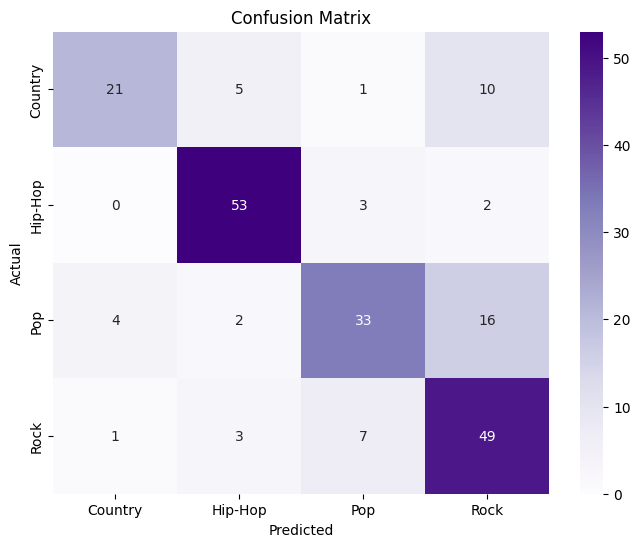

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def predict_genre(lyrics):
    cleaned = clean_lyrics(lyrics)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

interface = gr.Interface(
    fn=predict_genre,
    inputs=gr.Textbox(lines=10, placeholder="Paste song lyrics here..."),
    outputs="text",
    title="🎧 Music Genre Predictor",
    description="Paste lyrics and find out the genre!"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82400554fa18802a3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
